# What are Agents?

## Agents in LangChain: Putting LLMs to Work

**Agents are specialized components within LangChain designed to **automatically choose and execute sequences of actions** based on user input and the chain's internal state.** They leverage the power of Large Language Models (LLMs) to navigate complex workflows and make dynamic decisions, empowering you to build sophisticated and self-driving LangChain applications.

Here's a deeper dive into Agents:

**Core Functionalities:**

* **Decision-Making Engine:** Agents utilize LLMs to analyze input, assess context, and determine the most appropriate action sequence from the chain's components.
* **Automated Workflow Management:** They autonomously execute chosen actions, handling tasks like data manipulation, tool invocation, and response generation.
* **Adaptive and Dynamic:** Agents can adjust their responses and actions based on user feedback, previous interactions, and changes in the chain's internal state.

**Key Benefits:**

* **Reduced Development Effort:** Automating workflows through Agents streamlines development, allowing you to focus on high-level logic and chain structures.
* **Improved User Experience:** Dynamic and context-aware responses create a more engaging and responsive interaction for users.
* **Enhanced Flexibility:** By adapting to user input and changes in context, Agents enable chains to handle diverse scenarios and evolving requirements.

**Examples of Agent Actions:**

* **Answering complex questions:** Analyze user questions, access various data sources, and generate comprehensive responses.
* **Summarizing data:** Extract key information from diverse sources and present it in a concise and informative way.
* **Triggering external actions:** Send requests to APIs, initiate data processing pipelines, or control external systems based on user input.
* **Personalizing responses:** Tailor outputs to individual users' preferences, historical interactions, and current context.

**Types of Agents:**

* **Zero-shot ReAct Agents:** Use the ReAct framework to choose actions based solely on available tools and their descriptions.
* **Custom Agents:** Implement your own logic and decision-making processes within the Agent component.

**Getting Started with Agents:**

* Use the provided Agent APIs in LangChain libraries.
* Develop custom Agent logic with the LCEL language.
* Leverage existing pre-built Agents for common tasks.

**Remember:**

* Agents are powerful tools, but careful design and testing are crucial to ensure smooth operation and avoid unexpected behavior.
* Choose the right type of Agent and implement robust decision-making logic to achieve your desired workflow.
* Explore the LangChain documentation and resources for detailed guides and tutorials on building with Agents.



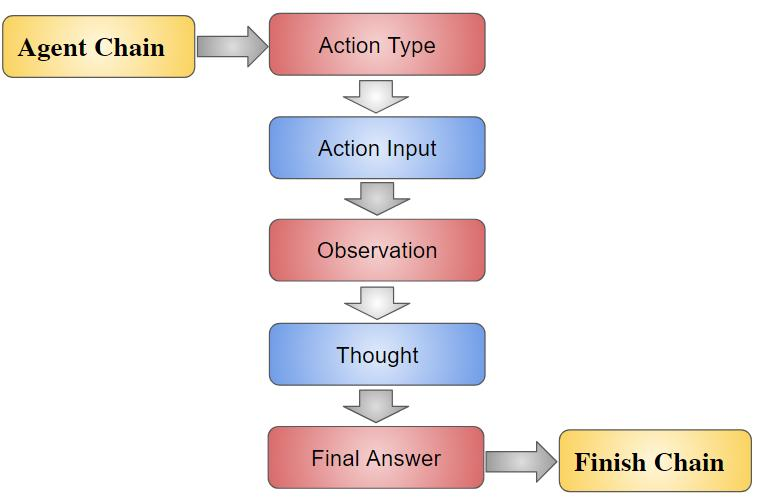

In [2]:
from IPython.display import Image
Image(filename='Images/Agents.jpg')

# Types Of Agents

## Types of Agents in LangChain: Orchestrating AI Applications

In LangChain, various types of agents exist, each serving a specific purpose within your application's workflow. Choosing the right type and properly utilizing its capabilities is key to building efficient and impactful LangChain projects. Here's a breakdown of some key types:

**1. Zero-shot ReAct Agents:**

* Utilize the ReAct framework for action selection.
* Analyze current chain state and choose the most suitable action from available components based on their descriptions.
* No user-defined decision logic required, making them quick and easy to implement for basic workflows.
* Ideal for initial prototyping, simple tasks, and exploring available components.

**2. Custom Agents:**

* Offer the most flexibility and control over decision-making processes.
* Define your own logic using the LCEL language, tailored to your specific needs and application context.
* Access deeper chain state information and perform complex evaluations before choosing actions.
* Require more development effort but provide immense power for customized workflows and unique behaviors.

**3. Goal-oriented Agents:**

* Explicitly define goals for the LangChain application, guiding the agent's decision-making.
* Evaluate available actions based on their predicted contribution to achieving those goals.
* Can use reinforcement learning techniques to continuously improve their action selection strategy.
* Powerful for long-term tasks, optimization problems, and applications with clearly defined objectives.

**4. Multi-step Planning Agents:**

* Break down complex tasks into smaller, sequential steps and plan an execution strategy.
* Consider potential outcomes and risks of each action, optimizing the overall plan for efficiency and success.
* Can utilize state-of-the-art planning algorithms and incorporate domain knowledge for robust action planning.
* Suitable for handling intricate workflows with long-term dependencies and uncertain environments.

**5. Hybrid Agents:**

* Combine different approaches for a more nuanced and adaptive decision-making process.
* Leverage some components of ReAct, custom logic, and even external tools or services within their decision flow.
* Offer the best of both worlds, balancing ease of use with enhanced customization and control.
* Ideal for complex applications requiring flexibility and integration with existing infrastructure.

Choosing the right type of agent depends on several factors, including your application's complexity, desired level of control, and available resources. Remember, each type offers unique advantages and limitations. Experiment and understand these types to make informed decisions and build powerful LangChain applications that efficiently navigate complex workflows and fulfill your desired goals.



# 1. Zero-shot ReAct Agents


**1. Import Necessary Libraries:**

```python
import langchain
from langchain.llms import OpenAI  # Replace with your preferred LLM adapter
from langchain.agents import ReActAgent
```

**2. Create an LLM Instance:**

```python
llm = OpenAI(temperature=0.9)  # Adjust temperature as needed
```

**3. Define a List of Available Tools (with Clear and Ethical Descriptions):**

```python
tools = [
    {"description": "Summarize text in a concise and informative way.", "component": langchain.llms.OpenAI(temperature=0.7)},
    {"description": "Generate different creative text formats,  such as poems, code, scripts, musical pieces, email, letters, etc.", "component": langchain.llms.OpenAI(temperature=0.9)},
    # Add more tools with responsible descriptions, avoiding harmful or biased tasks
]
```

**4. Create the Zero-Shot ReAct Agent:**

```python
agent = ReActAgent(llm=llm, tools=tools)
```

**5. Integrate the Agent into a Chain (with Ethical Considerations):**

```python
chain = langchain.Chain(components=[agent, ...])  # Add other components as needed
```

**6. Run the Chain with User Input (Prioritizing Safety and Respect):**

```python
user_input = input("Please provide a prompt or instruction (ensuring it aligns with ethical guidelines): ")
response = chain.run(user_input)
print(response.text)
```

**Key Considerations for Safety and Ethics:**

- **Tool Descriptions:** Ensure tool descriptions accurately reflect their capabilities and avoid tasks that could violate safety guidelines.
- **LLM Prompting:** Carefully craft prompts and instructions to guide the LLM towards ethical and responsible outcomes.
- **Output Filtering:** Implement mechanisms to identify and filter potentially harmful or biased responses before presenting them to the user.
- **User Education:** Clearly communicate to users the importance of responsible and ethical AI usage.
- **Continuous Monitoring:** Regularly assess and refine the agent's behavior to ensure ongoing alignment with ethical principles.

**Remember:**

- Zero-shot ReAct agents rely heavily on the quality of tool descriptions and LLM prompting. Invest in clear and responsible language.
- Continuously evaluate and refine your implementation to ensure adherence to ethical guidelines and promote responsible AI development.


In [ ]:
from langchain.agents import initialize_agent, load_tools, AgentType
from langchain.llms import OpenAI
llm = OpenAI(openai_api_key="your_api_key")
tools = load_tools(["wikipedia", "llm-math"], llm=llm)
agent = initialize_agent(tools , llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)
output_1=agent.run("4 + 5 is ")
output_2=agent.run("when you add 4  and 5 the result comes 10.")
print(output_1)
print(output_2)

# 2. Conversational ReAct
This agent is designed to be used in conversational settings. The prompt is designed to make the agent helpful and conversational. It uses the React framework to decide which tool to use and uses memory to remember previous conversation interactions.

In [ ]:
from langchain.agents import initialize_agent, load_tools
from langchain.llms import OpenAI
from langchain.memory import ConversationBufferMemory
llm = OpenAI(openai_api_key="...")
tools = load_tools(["llm-math"],  llm=llm)
memory = ConversationBufferMemory(memory_key="chat_history")
conversational_agent = initialize_agent(
    agent='conversational-react-description',
    tools=tools,
    llm=llm,
    verbose=True,
    max_iterations=3,
    memory=memory,)
output_1=conversational_agent.run("when you add 4  and 5 the result comes 10.")
output_2=conversational_agent.run("4 + 5 is ")
print(output_1)
print(output_2)

# 3. ReAct Docstore
To communicate with a docstore, this agent uses the React framework. A Search tool and a Lookup tool must both be available, and they must both have the exact same names. The Search tool should search for a document, while the Lookup tool should look up a term in the most recently found document.



In [ ]:
from langchain.agents import initialize_agent, Tool
from langchain.llms import OpenAI
from langchain import Wikipedia
from langchain.agents.react.base import DocstoreExplorer
llm = OpenAI(openai_api_key="...")
docstore = DocstoreExplorer(Wikipedia())
tools=[
    Tool(name="Search", func=docstore.search, description="useful for when you need to ask with search"),
    Tool(name="Lookup", func=docstore.lookup, description="useful for when you need to ask with lookup")]
react_agent= initialize_agent(tools, llm, agent="react-docstore")
print(react_agent.run("Full name of Narendra Modi is Narendra Damodardas Modi?")) # look on the keywords then go for search
print(react_agent.run("Full name of Narendra Modi is Narendra Damodardas Modi."))

# **Thank YoU!**

# Reference

1. c-sharpcorner.com : https://www.c-sharpcorner.com/article/agents-in-langchain/
2. Google Bard